<a href="https://colab.research.google.com/github/MutumaIan/Machine-Learning-/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
#This is a sentiment analysis program that parses the tweets from twitter using python

#import the libraries

In [3]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
plt.style.use("fivethirtyeight")

In [19]:
#Load the twitter Login data
from google.colab import files

uploaded_files = files.upload()

Saving titanic.csv to titanic.csv


In [20]:
uploaded_files

{'titanic.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S\

In [31]:
#Get the Twitter credentials Data
import json 

#Enter the keys as strings
credentials = {}

credentials['consumerkey']='XXXX'
credentials['consumersecret']= 'XXXX'
credentials['accesskey']='XXXX'
credentials['accesskeysecret'] = 'XXXX'

with open("twitter_credentials.json", "w") as file:
  json.dump(credentials, file)




In [34]:
#Twitter API credentials
consumerkey=credentials['consumerkey']
consumersecret=credentials['consumersecret']
accesskey=credentials['accesskey']
accesskeysecret=credentials['accesskeysecret']



In [37]:
#Create the Authentication Object
authenticate = tweepy.OAuthHandler(consumerkey, consumersecret)


#set the access token and the access token secret
authenticate.set_access_token(accesskey, accesskeysecret)

#create the API object while passing in the auth information.

api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [239]:
#I'm gonna be using my twitter account BillGates
#extract 100 tweets from my user

posts=api.user_timeline(screen_name = 'BillGates', count=100, lang='en', tweet_mode='extended')

#print the last 5 tweets from the accout
print("show the last 5 tweets: \n")
i=1
for tweet in posts[0:5]:
  print(str(i) + ') ' + tweet.full_text + '\n')
  i=i+1

show the last 5 tweets: 

1) The best way to prevent new variants from emerging is by stopping transmission of the virus altogether: https://t.co/KhJoM3LBmr https://t.co/5Vhfsjew3D

2) It's encouraging to see innovation and clean energy investments at the forefront of @POTUS's #AmericanJobsPlan. Building markets for new energy technologies is good for jobs today and will build the economies we need while avoiding a climate disaster. https://t.co/V6GcPSiaH8

3) Here are five things you should know if you want to understand how variants are (and aren’t) complicating the pandemic. https://t.co/rANiDcZynJ

4) RT @IFPRI: 💡 From #climateadaptation to #genderequality, discover @CGIAR’s 50 years of innovations that changed the world 🌎 🎉: https://t.co…

5) The technological transformation we need to address climate change can create good, safe jobs and build a more equitable, prosperous economy. To make that happen, we need to think big: https://t.co/jFWTPyaOAq https://t.co/PR5sxI7aDt



In [240]:
#create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

#Show the first 5 rows of data
df[:5]

,Tweets
0,The best way to prevent new variants from emer...
1,It's encouraging to see innovation and clean e...
2,Here are five things you should know if you wa...
3,RT @IFPRI: 💡 From #climateadaptation to #gende...
4,The technological transformation we need to ad...


In [241]:
#clean the text

#create a function to clean the data


def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)  #we are going to pick the patter in raw form and remove it. Removing the @mentions
  text = re.sub(r'#', '', text) # remove the hashtags
  text = re.sub(r'RT[\s]+', '', text)  # Remove the RT in retweeted tweets
  text = re.sub(r'https?:\/\/\S+', '', text) # Removes the hyperlink
  text = re.sub(r'(?<=\w\s)\n', '', text)

#to remove emoji
  EMOJI_PATTERN = re.compile(
    "(["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "])")

    #Thanks https://gist.github.com/mgaitan for above emoji removing code
  

  text = re.sub(EMOJI_PATTERN, r' \1 ', text)

  return RE_EMOJI.sub(r' ', text)

  return text

#Now let's apply it on the dataframe

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df.head()

,Tweets
0,The best way to prevent new variants from emer...
1,It's encouraging to see innovation and clean e...
2,Here are five things you should know if you wa...
3,: From climateadaptation to genderequality...
4,The technological transformation we need to ad...


**TextBlob** returns **polarity and subjectivity** of a sentence. **Polarity** lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Negation words reverse the polarity. TextBlob has semantic labels that help with fine-grained analysis. For example — emoticons, exclamation mark, emojis, etc. **Subjectivity** lies between [0,1]. Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information. TextBlob has one more parameter — intensity. TextBlob calculates subjectivity by looking at the ‘intensity’. Intensity determines if a word modifies the next word. For English, adverbs are used as modifiers (‘very good’).

[Read More on Text Blob here](https://textblob.readthedocs.io/en/dev/)

In [242]:
#create a function to get the subjectivity 

def getsubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity 

def getpolarity(text):
  return TextBlob(text).sentiment.polarity

#create two new columns for subjectivity and polarity

df['Subjectivity'] = df['Tweets'].apply(getsubjectivity)
df['Polarity'] = df['Tweets'].apply(getpolarity)

#Display the dataframe with the two new columns created
df.head()

,Tweets,Subjectivity,Polarity
0,The best way to prevent new variants from emer...,0.377273,0.568182
1,It's encouraging to see innovation and clean e...,0.584848,0.401010
2,Here are five things you should know if you wa...,0.000000,0.000000
3,: From climateadaptation to genderequality...,0.000000,0.000000
4,The technological transformation we need to ad...,0.425000,0.425000


Word cloud lets your create, yes, a cloud of words based on their context or repetition

[Word Cloud](http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html)

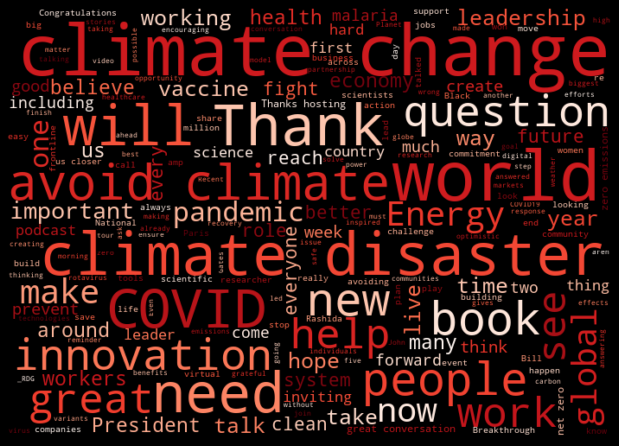

In [243]:
#Plot a Word Cloud 

allwords = ''.join([tweets for tweets in df['Tweets']])
wordCloud = WordCloud(width=700, height = 500, random_state=42, max_font_size=120, colormap='Reds').generate(allwords)

plt.figure( figsize=(10,6), facecolor='k')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

In [244]:
#create a function to compute the negative, neutral and positive analysis

def getAnalysis(score):
  if score < 0:
    return 'Negative'
  if score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,The best way to prevent new variants from emer...,0.377273,0.568182,Positive
1,It's encouraging to see innovation and clean e...,0.584848,0.401010,Positive
2,Here are five things you should know if you wa...,0.000000,0.000000,Neutral
3,: From climateadaptation to genderequality...,0.000000,0.000000,Neutral
4,The technological transformation we need to ad...,0.425000,0.425000,Positive


In [245]:
#Print all of the positive tweets 

j=1

sortedDF = df.sort_values(by=['Polarity'])

for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j+1

1) The best way to prevent new variants from emerging is by stopping transmission of the virus altogether:  

2) It's encouraging to see innovation and clean energy investments at the forefront of 's AmericanJobsPlan. Building markets for new energy technologies is good for jobs today and will build the economies we need while avoiding a climate disaster. 

3) The technological transformation we need to address climate change can create good, safe jobs and build a more equitable, prosperous economy. To make that happen, we need to think big:  

4) I had a great time answering questions about my new book, climate change, and COVID-19 on  last week. Here’s a recap of the conversation. 

5) In this video, I answered some really good questions, including one about two really important numbers. Come ask me some questions of your own on  at 11:15:  

6) I named my book “How to Avoid a Climate Disaster,” not “How to Stop Climate Change,” because our climate is already changing—and no one will

In [246]:
sortedDF

,Tweets,Subjectivity,Polarity,Analysis
10,It’s deeply unfair that the people who contrib...,0.800000,-0.600000,Negative
64,"COVID-19 has cost lives, sickened millions, an...",0.500000,-0.500000,Negative
71,The President’s commitment to reengage with th...,0.600000,-0.400000,Negative
44,": The Weekly Planet: Lately, Bill Gates has be...",0.570833,-0.295833,Negative
11,: Over the past few weeks health workers in Et...,0.175000,-0.225000,Negative
...,...,...,...,...
76,: The best emergency system is a strong primar...,0.511111,0.611111,Positive
85,The season finale of our podcast features two ...,0.700000,0.700000,Positive
90,Here are five books that I’d recommend as we w...,0.600000,0.700000,Positive
75,It’s great to see India’s leadership in scient...,0.750000,0.800000,Positive


In [247]:
#Let's print the negative tweets

j = 1 

sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(i) + ') ' + df['Tweets'][i])
    print()
    j = j+1

10) It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects:  

11) : Over the past few weeks health workers in Ethiopia       , Nigeria       , Sudan        and the Philippines        were vaccinated against COVI…

15) For decades, Australian researcher Ruth Bishop led global efforts to identify and combat rotavirus. Her life is a reminder of the importance of scientific research to uncover unknown pathogens and the power of vaccines to prevent suffering and save lives. 

21) : Black folks have questions about the COVID-19 vaccine. I sat down w/ Black healthcare workers &amp; they answered my questions.…

27) Recent extreme weather events are a stark reminder that we’re already seeing the effects of climate change here at home and around the world. This type of observation system will help scientists monitor and predict future weather events. 

31) There are several ways individuals can help move us closer to a zero-carbon f

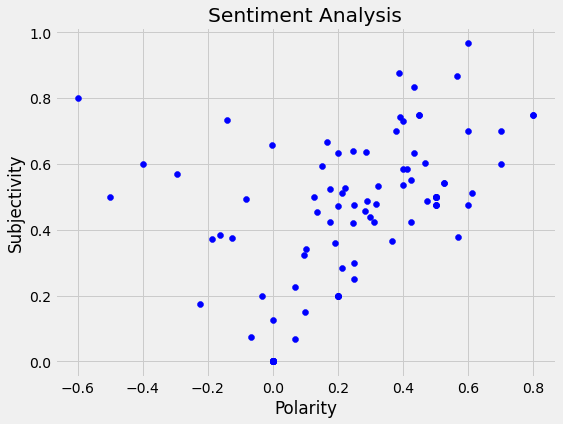

In [248]:
# plot polarity and subjectivity

plt.figure(figsize=(8,6))

for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [253]:
# get the percentage of the positive tweets

ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']


round((ptweets.shape[0] / df.shape[0]) *100 , 1)

71.0

In [257]:
# Get the percentage of the negative tweets

ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0]/ df.shape[0]) *100, 1)

13.0

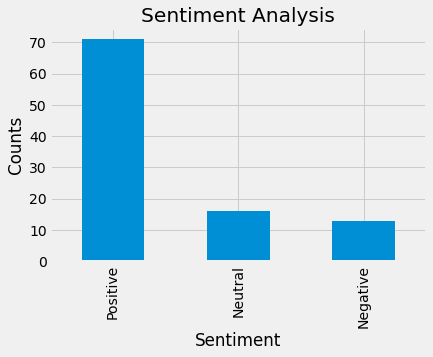

In [261]:
# Show the Value counts

df['Analysis'].value_counts()

#plot and Visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()